In [1]:
from keyword import iskeyword
import numpy as np


def is_valid_var_name(name):
    return name.isidentifier() and not iskeyword(name)


class Table(object):
    def __init__(self, data,
                 row_label=None, row_categories=None,
                 column_label=None, column_categories=None):
        self.row_label = row_label
        self.row_categories = row_categories
        self.column_label = column_label
        self.column_categories = column_categories
        self._data = np.asarray(data, dtype=object)
    
    def __getitem__(self, key):
        return self._data[key]
    
    def __setitem__(self, key, item):
        self._data[key] = item
    
    def __call__(self, row_key, column_key):
        return self._data[self.row_categories.index(row_key)][self.column_categories.index(column_key)]
        
        
def draw_table(data,
               row_label=None, row_categories=None,
               column_label=None, column_categories=None,
               name=None, frame=False, **kwargs):
    if isinstance(data, Table):
        row_label = data.row_label
        row_categories = data.row_categories
        column_label = data.column_label
        column_categories = data.column_categories
        data = data[:]
    
    assert len(data) >= 1 and len(data[0]) >= 1
    assert name is None or is_valid_var_name(name)
    
    if 'skip_zeroes' not in kwargs: kwargs['skip_zeroes'] = True
    if 'truncate' not in kwargs: kwargs['truncate'] = True
        
    if name is not None:
        globals()[name] = Table(data,
                                row_label=row_label, 
                                row_categories=row_categories,
                                column_label=column_label, 
                                column_categories=column_categories)
    
    cat_or_label = any([row_label, column_label, 
                        row_categories, column_categories])
    
    s = r'\begin{array}{'
    if frame:
        s += '|'
    if cat_or_label:
        s += 'r|'
    s += 'c{}'.format('|' if frame else ' ') * len(data[0]) + '} '
    if frame:
        s += r'\hline '
    if row_categories:
        s += r'{\bf ' + row_label + r' \backslash ' + column_label + '} & '
        for l in column_categories:
            s += r'{\bf ' + str(l) + '}' + ' & '
        s = s[:-2] + r' \\ \hline '
    for i, row in enumerate(data):
        if row_categories:
            s += r'{\bf' + str(row_categories[i]) + '} & '
        for e in row:
            if parent(e) is RR:
                s += e.str(**kwargs)
            else:
                s += str(e)
            s += ' & '
        s = s[:-2] + r'\\ '
        if frame:
            s += r'\hline '
    s += r'\end{array}'
    return s

##### F21ETSMP Group Assignment 6
## Contagious Diseases
# Ebola Outbreak II
We continue with the Ebola outbreak from lesson 2.  
Ten patients are admitted to a hospital. Assume that each patient has a chance of 0.5 of being infected.  
We define a random variable $X$ that is the total number of infected patients at day 0.

## Process 1:
Show three different versions of how an outbreak in the hospital can develop over 10 days if:  
 *  __Day 1-10:__ Number of infected patients $𝑋$ is constant.  
This is a stochastic process, we can write it as:  
$$Y(n)=X$$  
where $X \sim \mathcal B(10, 0.5)$ is a random binomial distributed variable and $n$ is the day ($n = 1, \dots, 10$)

### 1) Make a function that generates realizations of the process $Y(n)$.

In [2]:
import scipy.stats
X = scipy.stats.binom(10, 0.5)
def generate_real_Yn():
    day = range(10)
    num_infected = [X.rvs()]*len(day)
    return day, num_infected

### 2) Plot three realizations of $Y(n)$

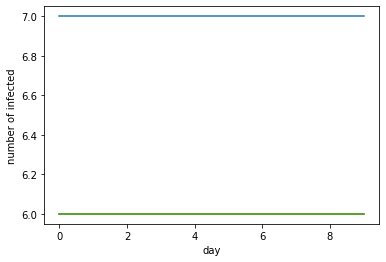

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(*generate_real_Yn())
ax.set_xlabel('day')
ax.set_ylabel('number of infected')
plt.show()

### 3) What is the ensemble mean and variance of the process?

The ensemble mean here is found as the mean of the Binomially distributed variable $X$:  
$$E(X) = n \cdot p \mid X \sim \mathcal B (n, p)$$  
$$ \Rightarrow E(X) = 10 \cdot 0.5 = 5 $$  
And the variance by the same principle:  
$$ Var(X) = p \cdot n(1-p) \mid X \sim \mathcal B (n, p) $$  
$$ \Rightarrow Var(X) = 0.5 \cdot 10(1-0.5) = 2.5 $$

### 4) What is the mean and variance of one realization of the process?

Here the mean will be the whatever value X has for the given realization and the variance will be zero.

### 5) Verify 3 and 4 through simulation:

In [4]:
samples = [generate_real_Yn() for _ in range(1000)]
# Testing the mean and variance at index 0, but it is irrelevant since the process is constant
print('Ensemble mean at day 0: {}'.format(n(mean([v[0] for _, v in samples]), digits=3)))
print('Ensemble variance at day 0: {}'.format(n(variance([v[0] for _, v in samples]), digits=3)))

print('Mean of first realization: {}'.format(n(mean(samples[0][1]), digits=3)))
print('variance of first realization: {}'.format(n(variance(samples[0][1]), digits=3)))

Ensemble mean at day 0: 4.91
Ensemble variance at day 0: 2.54
Mean of first realization: 2.00
variance of first realization: 0.000


### 6) Is the process Wide Sense Stationary and ergodic?

Since the process doesn't change characteristics with time, i.e. the ensemble mean and variance is independent of t, __the process is WSS.__  
On the other hand, since meassuring a single realization, no matter for how long, won't reveal the characteristics of the whole system, __the process is not ergodic__. This can be seen from the fact that the mean and variance for a single realization differs from the ensemble mean and variance.

## process 2:
We now work with a scenario where patients die, are infected and are cured. Show three different versions of how an outbreak in the hospital can develop over 10 days if:  
We define another random variable $W(n)$ that is a discretely uniformly distributed, and can take the values $\{-2,-1, 0, 1, 2\}$. The variables in $W$ are independent and identically distributed (i.i.d.).  

 *  __Day 1:__ Number of infected patients is $X$ plus a random variable $W(1)$.
 *  __Day 2:__ Number of infected patients is $X$ plus a random variable $W(2)$.
 *  __Day n:__ Number of infected patients is $X$ plus a random variable $W(n)$.  

This is a stochastic process, we can write as:
$$ Y(n) = X + W(n) $$  
where $X \sim \mathcal B(10, 0.5) $ is a random variable and $n$ is the day ($n = 1, \dots, 10$).  
The random variables $W(1), W(2), \dots W(10)$ are i.i.d. and distributed uniformly such that $W(n) \in \{-2, -1, 0, 1, 2\}$.

### 1) Make a function that generates realizations of the process $Y(n)$.

In [5]:
X = scipy.stats.binom(10, 0.5)
W = scipy.stats.randint(-2, 3)
def generate_real_Yn():
    day = range(10)
    x = X.rvs()
    num_infected = [x + W.rvs() for _ in day]
    return day, num_infected

### 2) Plot three realizations of $Y(n)$

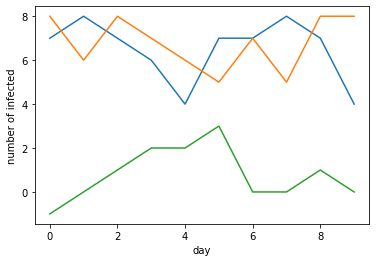

In [6]:
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(*generate_real_Yn())
ax.set_xlabel('day')
ax.set_ylabel('number of infected')
plt.show()

### 3) What is the ensemble mean and variance of the process?

The ensemble mean here is found as the sum of the means of the Binomially distributed variable $X$ and the uniformly distributed value $W$:  
$$ EX = n \cdot p \mid X \sim \mathcal B (n, p) $$  
$$ EW = \frac{a + b}{2} \mid W \sim \mathcal U(a, b) $$  
$$ E[Y(n)] = EX + EW(n) \mid Y(n) = X + W(n) $$  
$$ \Rightarrow E(Y(n) = 10 \cdot 0.5 + \frac{-2 + 2}{2} = 5 $$  
And the variance by the same principle:  
$$ Var(X) = p \cdot n(1-p) \mid X \sim \mathcal B (n, p) $$  
$$ Var(W) = \frac{{(b-a+1)}^2 - 1}{12} \mid W \sim \mathcal U (a, b) $$  
$$ Var(Y(n)) = Var(X) + Var(W(n)) \mid Y(n) = X + W(n) $$  
$$ \Rightarrow Var(Y(n)) = 0.5 \cdot 10(1-0.5) +  \frac{{\left(2-\left(-2\right)+1\right)}^2 - 1}{12} = 4.5 $$

### 4) What is the mean and variance of one realization of the process?

By the same reasoning as above, this can be done by taking the sum of the mean and variance of the two terms of the process.  
Since the W term are idd variables, the mean and variance can be calculated from the distributions of W(n), as for the ensemble.  
Since the mean of Wn is 0, __the mean of any single realization of Y will remain whatever value X takes.__  
Given that X is constant with time __the variance of a single realization becomes the variance of Wn which is 2__.


### 5) Verify 3 and 4 through simulation:

In [9]:
samples = [generate_real_Yn() for _ in range(1000)]
# Testing the mean and variance at index 0, but it is irrelevant since the process is WSS
print('Ensemble mean at day 0: {}'.format(n(mean([v[0] for _, v in samples]), digits=3)))
print('Ensemble variance at day 0: {}'.format(n(variance([v[0] for _, v in samples]), digits=3)))

print('Mean of first realization: {}'.format(n(mean(samples[0][1]), digits=3)))
print('variance of first realization: {}'.format(n(variance(samples[0][1]), digits=3)))

Ensemble mean at day 0: 4.96
Ensemble variance at day 0: 4.48
Mean of first realization: 4.20
variance of first realization: 1.73


### 6) Is the process Wide Sense Stationary and ergodic?

Since the added W(n) term is an i.d.d. variable, __the process remains wide sense stationary.__  
By more or less the same logic, the mean and variance information about X is still lost in a single realization, and so __the process is not ergodic__.

## Process 3
Work with the outbreak from lesson 2:  
 * __Day 1:__ Draw a random sample of the ten admitted patients.  
 * __Day 2:__ Assume that on the second day no patients are admitted.   
   Each ebola infected patienteither infects or does not infect another person with probability 0.5.  
 * __Day 3 and onwards:__ All old and new Ebola patients either infects or does not infect anotherperson with probability 0.5.

### 1) Show three different realizations of the process for 10 days.

The probability of any one patient having Ebola in this scenario was calculated in group assignment 2, to 0.21.

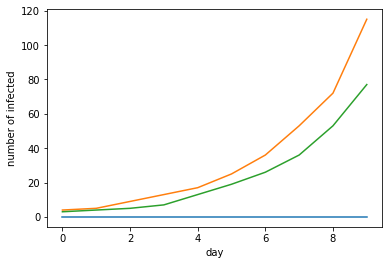

In [12]:
X = scipy.stats.binom(10, 0.21)
def generate_real_Yn():
    days = range(10)
    infected = [X.rvs()]
    for i in range(len(days)-1):
        infected.append(infected[i] + scipy.stats.binom.rvs(infected[i], 0.5))
    return days, infected
fig, ax = plt.subplots()
for i in range(3):
    ax.plot(*generate_real_Yn())
ax.set_xlabel('day')
ax.set_ylabel('number of infected')
plt.show()

### 2) Is this process Wide Sense Stationary (WSS), and is it ergodic?

Since this process keeps growing with time, the ensemble mean is time dependent, and __the process is not WSS.__  
Since a process can only be ergotic if it is WSS, __the process is not ergotic.__